**SO FIRST WE WE WILL IMPORT THE PYTHON LIBRARIES WHICH ARE NECESSARY FOR DATA PREPROCESSING **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

So After importing the python libraries we need to import the dataset and the head function gets the rows of the dataset

In [ ]:
credit_df = pd.read_csv('credit_card_application.csv')
credit_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-38,0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,-20,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,-16,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,-17,0


In [ ]:
credit_df.dtypes ## checking the datatypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
begin_month              int64
target                   int64
dtype: object

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
sum(credit_df.duplicated())

0

Which clearly indicates that there is no duplicate values in the dataset :

In [ ]:
credit_df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
begin_month                0
target                     0
dtype: int64

which indicates occupation types has missing values

In [ ]:
credit_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

 Encoded the categorical variables 

In [ ]:
categorical_credit_df = {"CODE_GENDER":     {"F": 0, "M": 1},
                "FLAG_OWN_CAR": {"N": 0, "Y": 1 },
                "FLAG_OWN_REALTY":     {"N": 0, "Y": 1 },
                "NAME_INCOME_TYPE": {"Working": 1, "Commercial associate": 2, "Pensioner": 3, "State servant": 4, "Student": 5 },
                "NAME_EDUCATION_TYPE": {"Secondary / secondary special": 1, "Higher education": 2, "Incomplete higher": 3, "Lower secondary": 4, "Academic degree": 5 },
                "NAME_FAMILY_STATUS":     {"Married": 1, "Single / not married": 2, "Civil marriage": 3, "Separated": 4, "Widow": 5},
                "NAME_HOUSING_TYPE":     {"House / apartment": 1, "With parents": 2, "Municipal apartment": 3, "Rented apartment": 4, "Office apartment": 5, "Co-op apartment": 6}
               }

using replace to replace the encoded values

In [ ]:
credit_score = credit_df.replace(categorical_credit_df)
credit_score.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,target
0,5008804,1,1,1,0,427500.0,1,2,3,4,-12005,-4542,1,1,0,0,2,-15,0
1,5008805,1,1,1,0,427500.0,1,2,3,4,-12005,-4542,1,1,0,0,2,-14,0
2,5008806,1,1,1,0,112500.0,1,1,1,1,-21474,-1134,1,0,0,0,2,-29,0
3,5008808,0,0,1,0,270000.0,2,1,2,1,-19110,-3051,1,0,1,1,1,-4,0
4,5008809,0,0,1,0,270000.0,2,1,2,1,-19110,-3051,1,0,1,1,1,-26,0


Again checking the dtypes before applying the summary function

In [ ]:
credit_score.dtypes

ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS          int64
begin_month              int64
target                   int64
dtype: object

 Descriptive Analysis of the dataset

In [ ]:
credit_score.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,target
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,1.866857e+05,1.817209,1.382204,1.635159,1.209699,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,1.017892e+05,0.990850,0.620944,1.115212,0.707569,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,1.000000,1.000000,1.000000,1.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,1.000000,1.000000,1.000000,1.000000,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,2.000000,2.000000,1.000000,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,5.000000,5.000000,5.000000,6.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


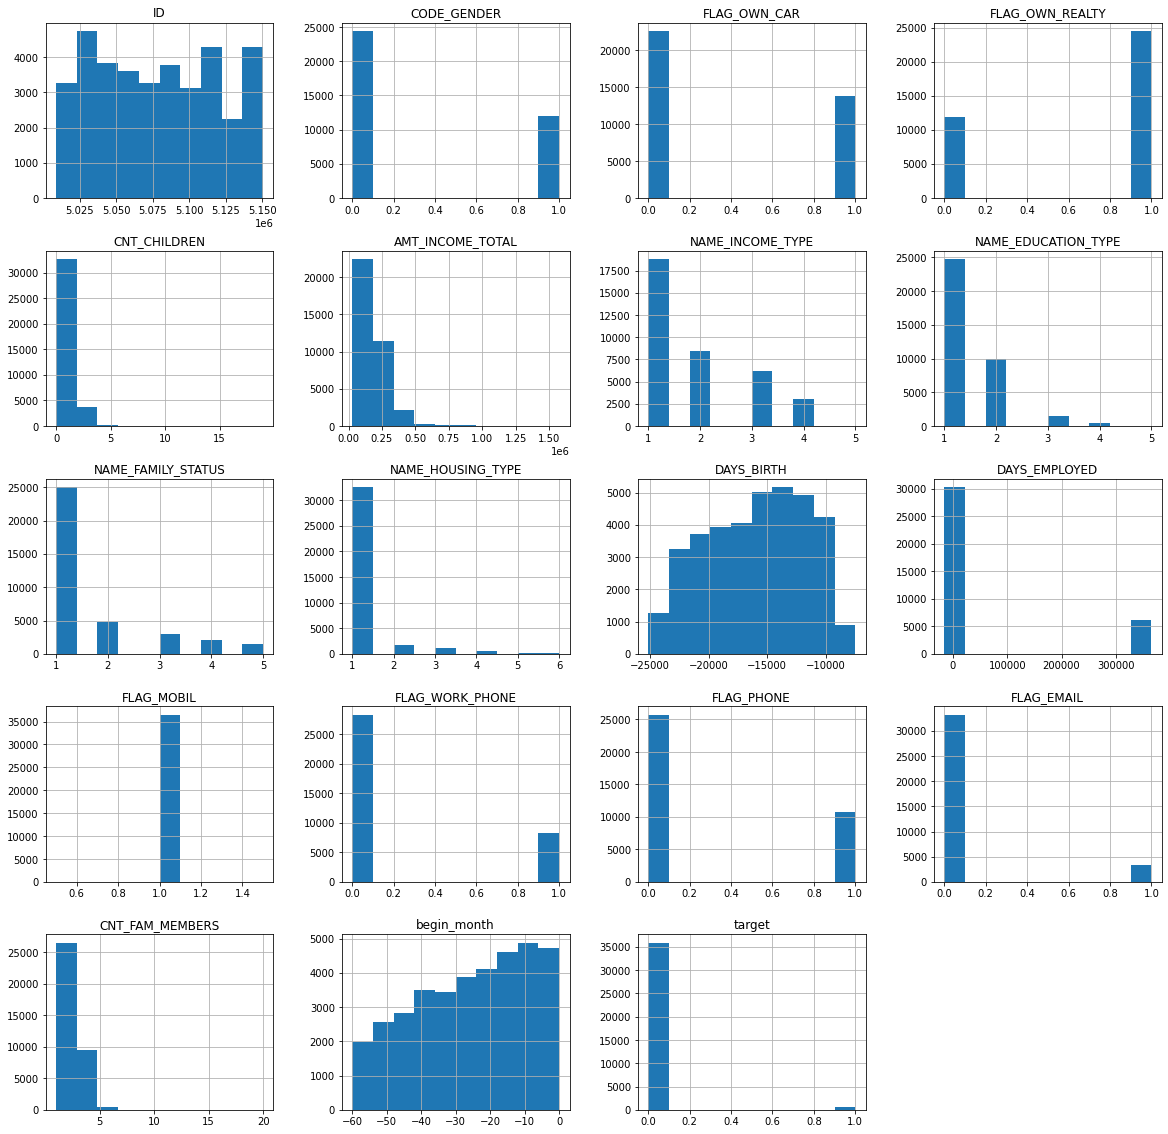

In [ ]:
#plot histogram of each parameter
credit_score.hist(figsize=(20,20))
plt.show()

Checking correlation of the dataset 

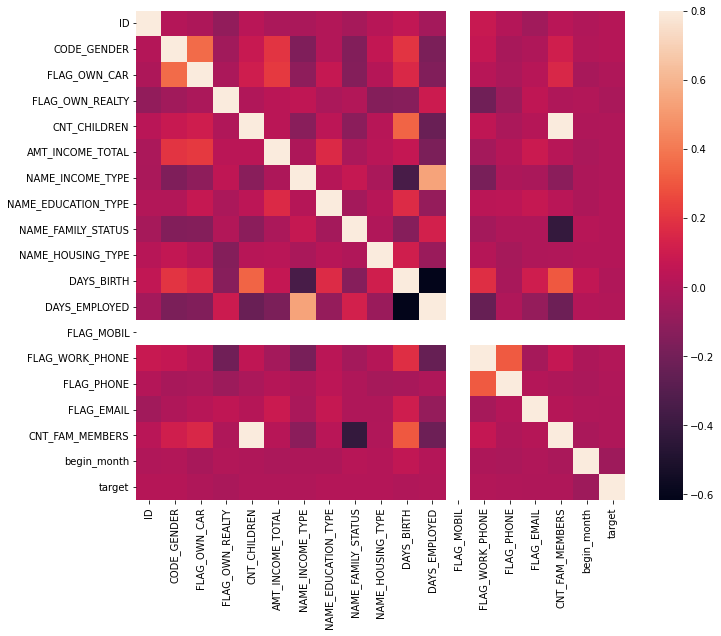

In [ ]:
corrplot = credit_score.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrplot, vmax = .8, square = True)
plt.show()

In [ ]:
X, y = credit_score.iloc[:,:-1],credit_score.iloc[:,-1]

Splitting the dataset into test and train with 70 and 30 ratio which is the ideal ratio

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Now we will use random forest in order to choose the important factors which affect the credit card application

In [ ]:
##n_estimators indicate the number of trees which we wish  to build before taking the maximum  average of prediction. More number of trees give better performance but makes  code slower.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)




In [ ]:
X, y = credit_score.iloc[:,:-1],credit_score.iloc[:,-1]

In [ ]:
X

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month
0,5008804,1,1,1,0,427500.0,1,2,3,4,-12005,-4542,1,1,0,0,2,-15
1,5008805,1,1,1,0,427500.0,1,2,3,4,-12005,-4542,1,1,0,0,2,-14
2,5008806,1,1,1,0,112500.0,1,1,1,1,-21474,-1134,1,0,0,0,2,-29
3,5008808,0,0,1,0,270000.0,2,1,2,1,-19110,-3051,1,0,1,1,1,-4
4,5008809,0,0,1,0,270000.0,2,1,2,1,-19110,-3051,1,0,1,1,1,-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1,1,1,1,-17348,-2420,1,0,0,0,2,-11
36453,5149834,0,0,1,0,157500.0,2,2,1,1,-12387,-1325,1,0,1,1,2,-23
36454,5149838,0,0,1,0,157500.0,3,2,1,1,-12387,-1325,1,0,1,1,2,-32
36455,5150049,0,0,1,0,283500.0,1,1,1,1,-17958,-655,1,0,0,0,2,-9


After Getting Random Forest we will check the importance score

In [ ]:

importance_score = rfc.feature_importances_
importance_score

array([0.24366157, 0.01756599, 0.01640581, 0.01620854, 0.01771851,
       0.09137474, 0.02843622, 0.02228106, 0.03245915, 0.01581902,
       0.15983848, 0.12060754, 0.        , 0.01247634, 0.01698311,
       0.00921522, 0.03101446, 0.14793423])

In [ ]:
for i,f in enumerate(importance_score):
    print('Feature: %0d, Score: %.5f' % (i,f))


Feature: 0, Score: 0.24366
Feature: 1, Score: 0.01757
Feature: 2, Score: 0.01641
Feature: 3, Score: 0.01621
Feature: 4, Score: 0.01772
Feature: 5, Score: 0.09137
Feature: 6, Score: 0.02844
Feature: 7, Score: 0.02228
Feature: 8, Score: 0.03246
Feature: 9, Score: 0.01582
Feature: 10, Score: 0.15984
Feature: 11, Score: 0.12061
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01248
Feature: 14, Score: 0.01698
Feature: 15, Score: 0.00922
Feature: 16, Score: 0.03101
Feature: 17, Score: 0.14793


In [ ]:
 rfc.fit(X_train,y_train)
predicted= rfc.predict(X_test)

Now we check the model accuracy

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10756
           1       0.33      0.09      0.14       182

    accuracy                           0.98     10938
   macro avg       0.66      0.54      0.56     10938
weighted avg       0.97      0.98      0.98     10938

[[10724    32]
 [  166    16]]


After checking the accuracy we get to know that results are 98% accurate and the value for f1 score is 99%

XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [ ]:
xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

pred = xg_reg.predict(X_test)

In [ ]:
xgb = xgb.XGBClassifier()

xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

0.9833607606509417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10756
           1       0.00      0.00      0.00       182

    accuracy                           0.98     10938
   macro avg       0.49      0.50      0.50     10938
weighted avg       0.97      0.98      0.98     10938

[[10756     0]
 [  182     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADA BOOST

In [ ]:
from sklearn import ensemble
ada = ensemble.AdaBoostClassifier()

ada.fit(X_train,y_train)

ada_pred = ada.predict(X_test)

print("Traing Score:%f"%ada.score(X_train,y_train))
print("Testing Score:%f"%ada.score(X_test,y_test))

Traing Score:0.982993
Testing Score:0.983269


In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test,ada_pred))
print(classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))

0.9832693362589139
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10756
           1       0.33      0.01      0.01       182

    accuracy                           0.98     10938
   macro avg       0.66      0.50      0.50     10938
weighted avg       0.97      0.98      0.98     10938

[[10754     2]
 [  181     1]]


With ADA boost the accuracy came out to be similar than that of random forest results and xgb classifier


1.   List item
2.   List item

